## The Strategy

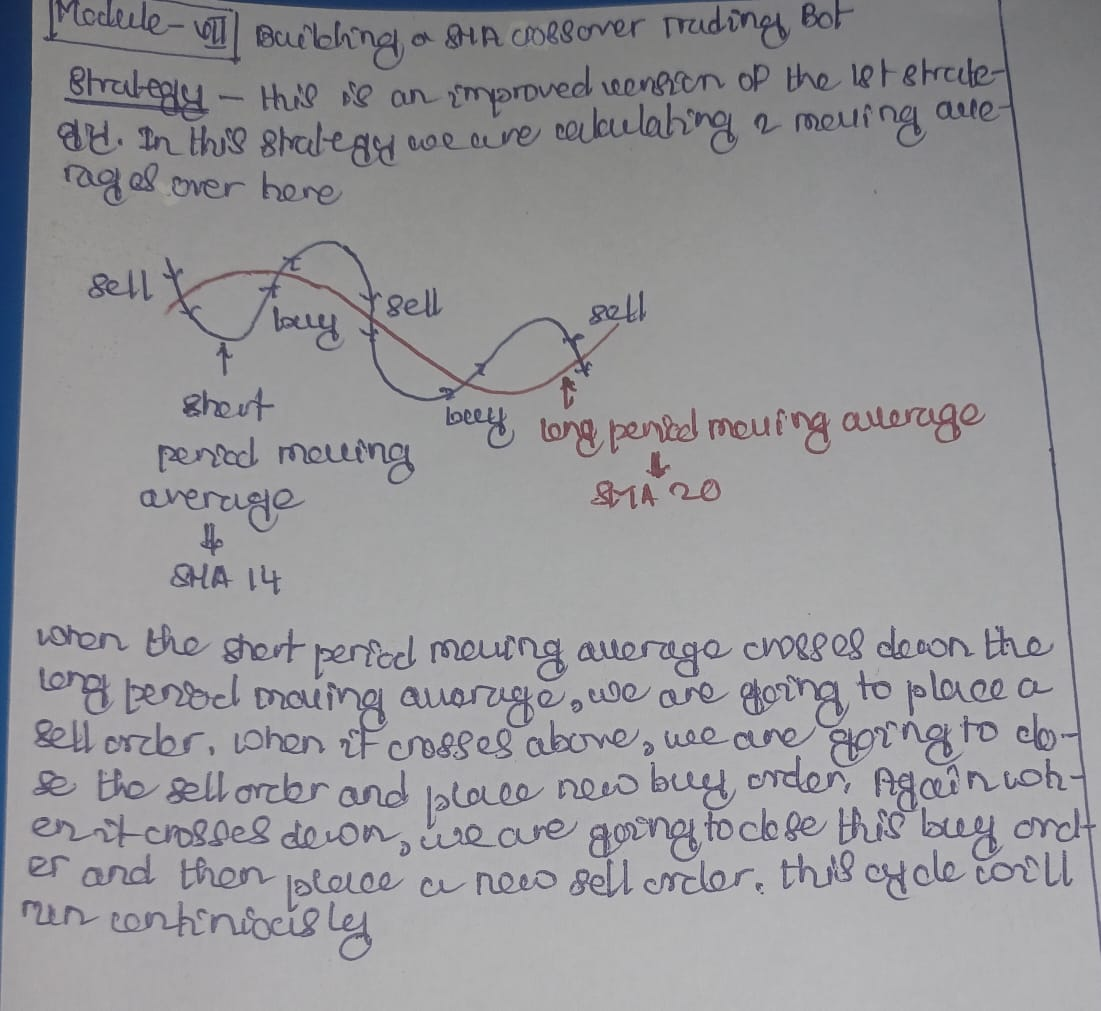

## Assembling the Bot

In [1]:
## import the libraries
import MetaTrader5 as mt5
import pandas as pd

In [2]:
## trading parameters
symbol = "EURUSD"
sma_preiod_1 = 14
sma_period_2 = 20
timeframe = mt5.TIMEFRAME_M1
volume = 0.05

In [3]:
## connect with python
mt5.initialize(login = 51386052, server = "ICMarketsSC-Demo", password ="8ZahZUPE")

True

In [4]:
## function to place market order
def market_order(symbol, volume, order_type):
    tick = mt5.symbol_info_tick(symbol)
    order_dict = {'buy': 0, 'sell': 1}
    price_dict = {'buy': tick.ask, 'sell': tick.bid}

    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": volume,
        "type": order_dict[order_type],
        "price": price_dict[order_type],
        "deviation": 20,
        "magic": 100,
        "comment": "python market order",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    }

    order_result = mt5.order_send(request)
    print(order_result)
    return order_result

In [5]:
## function to close a position
def close_position(position):
    tick = mt5.symbol_info_tick(position.symbol)

    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "position": position.ticket,
        "symbol": position.symbol,
        "volume": position.volume,
        "type": mt5.ORDER_TYPE_BUY if position.type == 1 else mt5.ORDER_TYPE_SELL,
        "price": tick.ask if position.type == 1 else tick.bid,
        "deviation": 20,
        "magic": 100,
        "comment": "python script close",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    }

    result = mt5.order_send(request)
    return result

In [6]:
## function to calculate the direction
def cal_direction(symbol, sma_period_1, sma_period_2, timeframe):
    candles1 = mt5.copy_rates_from_pos(symbol, timeframe, 1, sma_period_1)
    candles_df_1 = pd.DataFrame(candles1)
    candles2 = mt5.copy_rates_from_pos(symbol, timeframe, 1, sma_period_2)
    candles_df_2 = pd.DataFrame(candles2)
    sma1 = candles_df_1.close.mean()
    sma2 = candles_df_2.close.mean()
    if sma1 > sma2:
        return "buy"
    if sma1 < sma2:
        return  "sell"
    if sma1 == sma2:
        return "neutral"

In [7]:
## driver code
while True:
    direction = cal_direction(symbol, sma_preiod_1, sma_period_2, timeframe)
    if direction == "buy":
        for position in mt5.positions_get(symbol = symbol):
            if position.type == 1:
                close_position(position)
        if not mt5.positions_total():
            market_order(symbol, volume, direction)
            
    if direction == "sell":
        for position in mt5.positions_get(symbol = symbol):
            if position.type == 0:
                close_position(position)
        if not mt5.positions_total():
            market_order(symbol, volume, direction)

OrderSendResult(retcode=10009, deal=350471815, order=482858904, volume=0.05, price=1.06662, bid=1.0665499999999999, ask=1.06662, comment='Request executed', request_id=2700734169, retcode_external=0, request=TradeRequest(action=1, magic=100, order=0, symbol='EURUSD', volume=0.05, price=1.06662, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=0, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))
OrderSendResult(retcode=10009, deal=350472284, order=482859454, volume=0.05, price=1.0665499999999999, bid=1.0665499999999999, ask=1.06661, comment='Request executed', request_id=2700734171, retcode_external=0, request=TradeRequest(action=1, magic=100, order=0, symbol='EURUSD', volume=0.05, price=1.0665499999999999, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=1, type_time=0, expiration=0, comment='python market order', position=0, position_by=0))
OrderSendResult(retcode=10009, deal=350485436, order=482877215, volume=0.05,

KeyboardInterrupt: 

## Testing the Bot

Let's run the above code and wait for some time to see what happens. We will stop the bot and close the current positions.